# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [34]:
### YOUR CODE HERE ###
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('D:/Skillbox/Projects/telecom_users.csv').drop(columns='Unnamed: 0', axis=1).drop(['customerID'],axis=1).dropna()
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [35]:
data['TotalCharges'] = data['TotalCharges'].replace({' ':0}) # для тех, кто еще не платил
data['MonthlyCharges'] = data['MonthlyCharges'].astype(float) # тут же все числа
data['TotalCharges'] = data['TotalCharges'].astype(float) #тут же все числа

In [36]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [38]:
all_columns_to_change = data.select_dtypes(['object']).columns #где лучше возможные значения перевести в 0-1-2-3
all_columns_to_change

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [39]:
dictionary_for_codes = dict() #записывает кодировку
for i in all_columns_to_change:
    data[i], dictionary_for_codes[i] = pd.factorize(data[i])

In [40]:
print(data.head())
print(dictionary_for_codes) 

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        0           0      72             0   
1       1              0        1           1      44             0   
2       1              1        0           1      38             0   
3       0              0        1           1       4             0   
4       0              0        1           1       2             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                0               0             0   
1              1                1               1             1   
2              0                1               1             2   
3              1                2               1             2   
4              1                2               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   int64  
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   int64  
 3   Dependents        5986 non-null   int64  
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   int64  
 6   MultipleLines     5986 non-null   int64  
 7   InternetService   5986 non-null   int64  
 8   OnlineSecurity    5986 non-null   int64  
 9   OnlineBackup      5986 non-null   int64  
 10  DeviceProtection  5986 non-null   int64  
 11  TechSupport       5986 non-null   int64  
 12  StreamingTV       5986 non-null   int64  
 13  StreamingMovies   5986 non-null   int64  
 14  Contract          5986 non-null   int64  
 15  PaperlessBilling  5986 non-null   int64  
 16  PaymentMethod     5986 non-null   int64  


In [42]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.490478,0.161377,0.514868,0.700802,32.468760,0.098563,0.672903,1.129803,1.070498,1.219512,1.225359,1.074173,1.183428,1.175075,0.972436,0.589375,1.574841,64.802213,2294.221559,0.265119
std,0.499951,0.367909,0.499821,0.457945,24.516391,0.298100,0.645988,0.737824,0.704947,0.776381,0.778469,0.707174,0.762377,0.758854,0.673207,0.491988,1.066461,30.114702,2274.164124,0.441433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,35.650000,401.587500,0.000000
50%,0.000000,0.000000,1.000000,1.000000,29.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,70.400000,1408.575000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.900000,3841.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [43]:
[print(data.groupby(i)[i].count()) for i in data.columns]

gender
0    3050
1    2936
Name: gender, dtype: int64
SeniorCitizen
0    5020
1     966
Name: SeniorCitizen, dtype: int64
Partner
0    2904
1    3082
Name: Partner, dtype: int64
Dependents
0    1791
1    4195
Name: Dependents, dtype: int64
tenure
0      10
1     510
2     194
3     169
4     154
     ... 
68     89
69     77
70     90
71    152
72    308
Name: tenure, Length: 73, dtype: int64
PhoneService
0    5396
1     590
Name: PhoneService, dtype: int64
MultipleLines
0    2548
1    2848
2     590
Name: MultipleLines, dtype: int64
InternetService
0    1291
1    2627
2    2068
Name: InternetService, dtype: int64
OnlineSecurity
0    1291
1    2982
2    1713
Name: OnlineSecurity, dtype: int64
OnlineBackup
0    1291
1    2090
2    2605
Name: OnlineBackup, dtype: int64
DeviceProtection
0    1291
1    2055
2    2640
Name: DeviceProtection, dtype: int64
TechSupport
0    1291
1    2960
2    1735
Name: TechSupport, dtype: int64
StreamingTV
0    1291
1    2306
2    2389
Name: StreamingTV, dty

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

D:\Soft\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


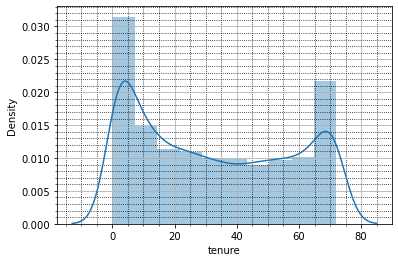

D:\Soft\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


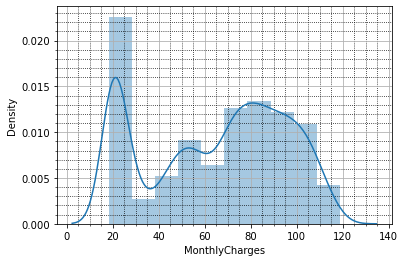

D:\Soft\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


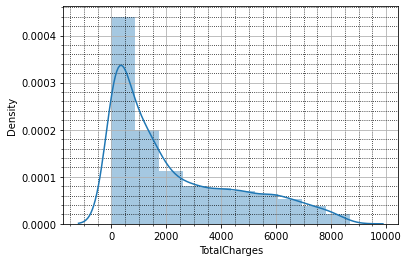

In [44]:
for i in ['tenure','MonthlyCharges','TotalCharges']:
    sns.distplot(data[i], bins=10)
    plt.grid()
    plt.minorticks_on()
    plt.grid(which='minor', color = 'k', linestyle = ':')
    plt.show()

# 2. Исследование зависимостей и формулирование гипотез

In [49]:
### YOUR CODE HERE ###
dataset = data.iloc[:,0:-1]
goal = data.iloc[:,-1]

D:\Soft\Anaconda\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


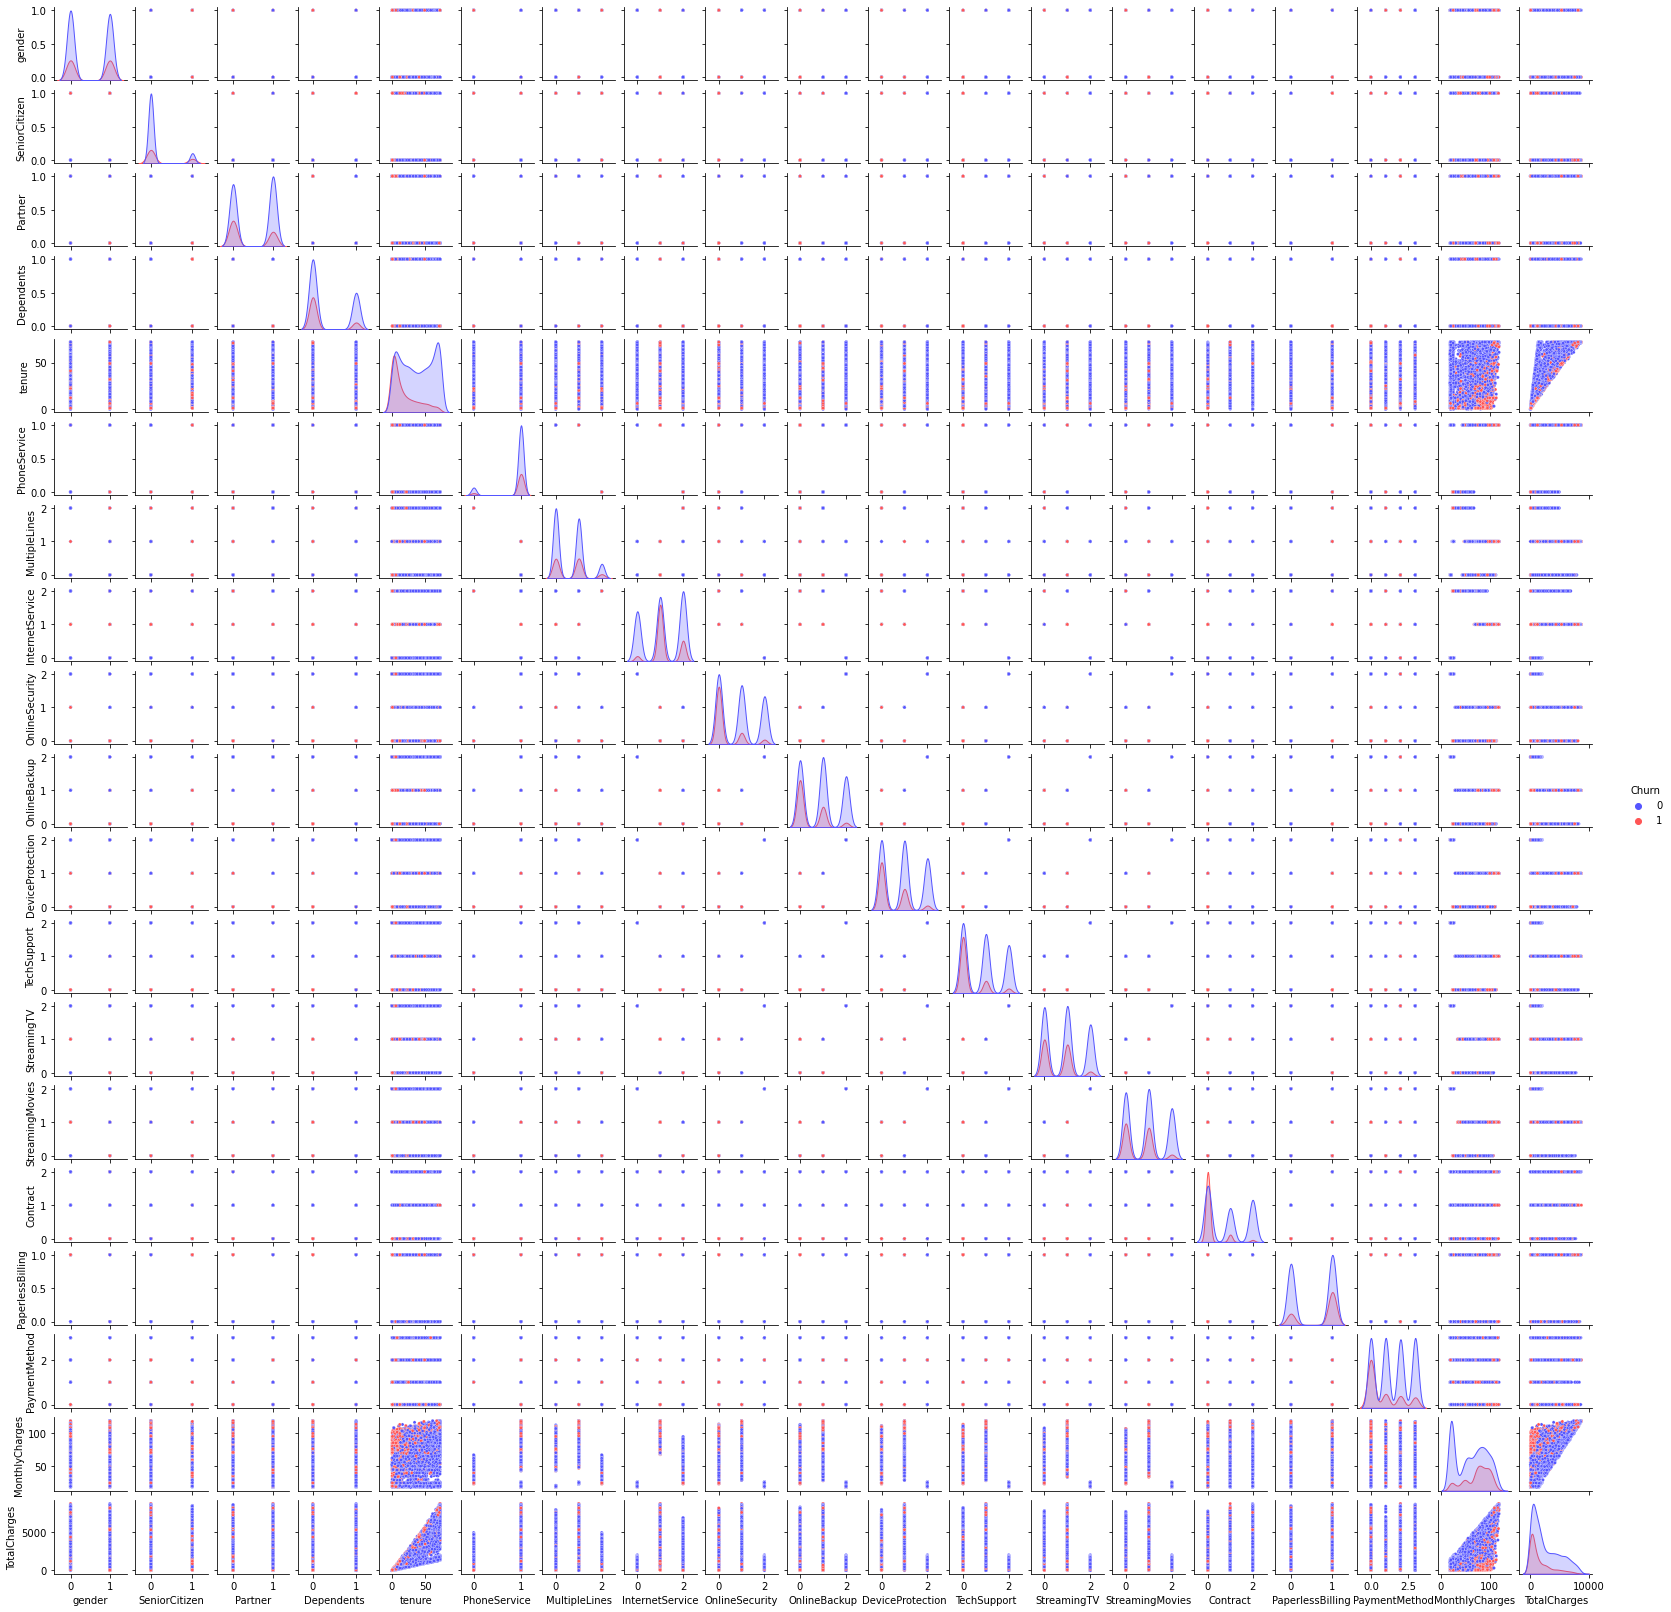

In [61]:
g = sns.pairplot(data, hue='Churn', palette = 'seismic', size=1.2, plot_kws=dict(s=10))

В первую очередь отметим, что лучше видна зависимость численных признаков т.е. тех, у которых много возможных значений (например, Tenure). У точечных (где может приниматься только пара значений, например, gender) увидеть такую закономерность сложнее. Цель модели - выяснить уйдет ли клиент т.е. 2 возможных ответа, что упрощает рассмотрение матрицы, т.к. достаточно найти плавное изменение цвета (как градиент), потому что в таком случае на крайних значениях признаки будут давать разный ответ на поставленный вопрос, а середина будет зависеть от подобранных коэф-тов модели. Таким образом выделим следующие признаки: tenure и MonthlyCharges, tenure и TotalCharges, tenure и InternetService, tenure и MultipleLines, TotalCharges и MonthlyCharges, MonthlyCharges и InternetService. Рассмотрим их как 5 признаков.
Будем в первую очередь смотреть на точность моделей т.к. такие модели позволят более точно посчитать на кого надеяться при формировании бюджета компании. Во вторую очередь посмотрим на полноту моделей и f-меру.

# 3. Построение моделей для прогнозирования оттока

In [77]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from sklearn.model_selection import train_test_split, cross_val_predict 
from sklearn.metrics import precision_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier

In [60]:
### YOUR CODE HERE ###
x_train, x_valid, y_train, y_result = train_test_split(dataset[['tenure',
                                                                'InternetService',
                                                                'MultipleLines',
                                                                'MonthlyCharges',
                                                                'TotalCharges']], goal, random_state=17)

knb = KNeighborsClassifier()
knb.fit(x_train, y_train)
knb_pred = knb.predict(x_valid)
knb_matrix = confusion_matrix(y_result, knb_pred)
knb_fscore = f1_score(y_result, knb_pred, average='binary')

gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_valid)
gnb_matrix = confusion_matrix(y_result, gnb_pred)
gnb_fscore = f1_score(y_result, gnb_pred, average='binary')

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)
dtc_matrix = confusion_matrix(y_result, dtc_pred)
dtc_fscore = f1_score(y_result, dtc_pred, average='binary')

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_valid)
lr_matrix = confusion_matrix(y_result, lr_pred)
lr_fscore = f1_score(y_result, lr_pred, average='binary')

clf = SVC().fit(x_train, y_train)
clf_pred = clf.predict(x_valid)
clf_matrix = confusion_matrix(y_result, clf_pred)
clf_fscore = f1_score(y_result, clf_pred, average='binary')

x_train, x_valid, y_train, y_valid = train_test_split(dataset[['tenure','InternetService','MultipleLines','MonthlyCharges','TotalCharges']], goal, random_state=17)
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_valid, y_valid)
params = {'objective': 'binary:logistic',
          'max_depth': 3, 
          'silent': 1,
          'eta': 0.1}
num_rounds = 60
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds)
xgb_pred = xgb_model.predict(dtest)
xgb_matrix = confusion_matrix(y_result, [0 if x<0.5 else 1 for x in xgb_pred])
xgb_fscore = f1_score(y_result, [0 if x<0.5 else 1 for x in xgb_pred], average='binary')

[23:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [61]:
interval = list(np.logspace(-0.99, 1.99, num=500))
skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)
for train_index, test_index in skf.split(dataset[['tenure','InternetService','MultipleLines','MonthlyCharges','TotalCharges']], goal):
    x_train, x_valid = dataset.iloc[train_index], dataset.iloc[test_index]
    y_train, y_valid = goal[train_index], goal[test_index]
lrcv = LogisticRegressionCV(Cs=interval, 
                            max_iter=500, 
                            cv=skf, 
                            random_state=17,
                            scoring="roc_auc")
lrcv.fit(x_train, y_train)
lrcv_value = lrcv.C_

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)
for train_index, test_index in skf.split(dataset[['tenure','InternetService','MultipleLines','MonthlyCharges','TotalCharges']], goal):
    x_train, x_valid = dataset.iloc[train_index], dataset.iloc[test_index]
    y_train, y_valid = goal[train_index], goal[test_index]
lrcv = LogisticRegressionCV(Cs=lrcv_value, 
                            max_iter=500, 
                            cv=skf, 
                            random_state=17,
                            scoring="roc_auc")
lrcv.fit(x_train, y_train)
lrcv_pred = lrcv.predict(x_valid)
lrcv_matrix = confusion_matrix(y_valid, lrcv_pred)
lrcv_fscore = f1_score(y_valid, lrcv_pred, average='binary')

D:\Soft\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Soft\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

In [78]:
x_train, x_valid, y_train, y_result = train_test_split(dataset[['tenure',
                                                                'InternetService',
                                                                'MultipleLines',
                                                                'MonthlyCharges',
                                                                'TotalCharges']], goal, random_state=17)
estimators = [('lr', RidgeCV()),
              ('svr', LinearSVR(random_state=17)),
              ('knr', KNeighborsRegressor(n_neighbors=20))
]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=40,
                                          random_state=17)
)
reg.fit(x_train, y_train)
meta_pred = reg.predict(x_valid)
meta_matrix = confusion_matrix(y_result, [0 if x<0.5 else 1 for x in meta_pred])
meta_fscore = f1_score(y_result, [0 if x<0.5 else 1 for x in meta_pred], average='binary')

D:\Soft\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Soft\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Soft\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Soft\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\Soft\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to c

# 4. Сравнение качества моделей 

In [79]:
all_matrix = {'knb':knb_matrix,
              'gnb':gnb_matrix,
              'dtc':dtc_matrix,
              'lr':lr_matrix,
              'lrcv':lrcv_matrix,
              'xgb':xgb_matrix,
              'clf':clf_matrix,
              'meta':meta_matrix,
             }
all_fscore = {'knb':knb_fscore,
              'gnb':gnb_fscore,
              'dtc':dtc_fscore,
              'lr':lr_fscore,
              'lrcv':lrcv_fscore,
              'xgb':xgb_fscore,
              'clf':clf_fscore,
              'meta':meta_fscore,
             }
metrics = {'knb':'KNeighborsClassifier',
           'gnb':'GaussianNB',
           'dtc':'DecisionTreeClassifier',
           'lr':'LogisticRegression',
           'lrcv':'LogisticRegressionCV',
           'xgb':'XGBClassifier',
           'clf':'SVC',
           'meta':'[RidgeCV,LinearSVR,KNeighborsRegressor,RandomForestRegressor]',
           }
for i in all_matrix.keys():
    print(f'Для модели {metrics[i]} получилась метрика f1 равна {all_fscore[i]:.3}')
    print(f'Точность модели равна {(all_matrix[i][0][0] / (all_matrix[i][0][0]+all_matrix[i][0][1])):.3}')
    print(f'Полнота модели равна {(all_matrix[i][0][0] / (all_matrix[i][0][0]+all_matrix[i][1][0])):.3}')
    print('Матрица ошибок ниже')
    print(all_matrix[i],'\n')

Для модели KNeighborsClassifier получилась метрика f1 равна 0.493
Точность модели равна 0.896
Полнота модели равна 0.82
Матрица ошибок ниже
[[999 116]
 [219 163]] 

Для модели GaussianNB получилась метрика f1 равна 0.514
Точность модели равна 0.831
Полнота модели равна 0.834
Матрица ошибок ниже
[[927 188]
 [185 197]] 

Для модели DecisionTreeClassifier получилась метрика f1 равна 0.476
Точность модели равна 0.821
Полнота модели равна 0.821
Матрица ошибок ниже
[[915 200]
 [200 182]] 

Для модели LogisticRegression получилась метрика f1 равна 0.491
Точность модели равна 0.913
Полнота модели равна 0.818
Матрица ошибок ниже
[[1018   97]
 [ 226  156]] 

Для модели LogisticRegressionCV получилась метрика f1 равна 0.587
Точность модели равна 0.907
Полнота модели равна 0.84
Матрица ошибок ниже
[[797  82]
 [152 166]] 

Для модели XGBClassifier получилась метрика f1 равна 0.541
Точность модели равна 0.915
Полнота модели равна 0.833
Матрица ошибок ниже
[[1020   95]
 [ 205  177]] 

Для модели SVC 

Получились слабые модели с точки зрения метрики f1-score. Специально привел для моделей матрицу ошибок, чтобы уточнить: не получилось модель SVC научиться предсказывать хоть изредка отличные от 0 значения. Не считая эту модель можно сказать, что полученные модели дают хорошую точность (около 0.9) и полноту (более 0.7). Для модели XGBClassifier использовал переход из вероятности в предсказания следующим образом: предсказанная величина менее 0.5 значит 0, иначе 1. Такая модель показывает лучшую точность среди моделей. Мета-модель показала невысокую точность для приведенных моделей (для RandomForestRegressor посмотрел несколько значений n_estimators). В целом из полученных моделей целесообразнее взять XGBClassifier или LogisticRegressionCV.